In [284]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [307]:
drop_row_idx = [272, 102591]

hospital_chosen_zip = pd.read_csv('../data/hospital_chosen_zip.csv', sep='|')

hospital_chosen_zip.drop(drop_row_idx, inplace=True)
hospital_chosen_zip.drop(hospital_chosen_zip[hospital_chosen_zip['zip'] == 78205].index, inplace=True)

grouped_hospital = hospital_chosen_zip.groupby('zip')
group_names = grouped_hospital.groups.keys()

In [286]:
hospital_gb_date = hospital_chosen_zip.groupby('collection_week')
hospital_gb_sum = hospital_gb_date.aggregate(np.sum)
hospital_gb_sum

,Unnamed: 0,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
collection_week,,,,,,,,,,,,,,,,,,,,,
2020/07/31,10946997,238585511,5095038.0,4100899.0,3656162.0,2949566.0,2555397.0,383743.0,291790.0,12636.0,...,657642.0,483682.0,447007.0,341680.0,111740.0,94909.0,0.0,0.0,0.0,-8.120024e+05
2020/08/07,33495299,246258163,5357968.0,4268222.0,3789037.0,3045414.0,2655945.0,361548.0,275638.0,12272.0,...,671083.0,488509.0,450632.0,343402.0,106116.0,89465.0,0.0,0.0,0.0,-1.116111e+06
2020/08/14,55653401,245782083,5367291.0,4327321.0,3839819.0,3097086.0,2706857.0,326957.0,253939.0,12496.0,...,678228.0,495777.0,458374.0,390107.0,97878.0,80956.0,0.0,0.0,0.0,-7.858305e+05
2020/08/21,78488943,248696968,5345627.0,4455845.0,3911716.0,3122618.0,2724246.0,300023.0,228321.0,10455.0,...,675020.0,510222.0,459010.0,357519.0,85716.0,70680.0,0.0,0.0,0.0,-5.375888e+05
2020/08/28,102262466,250712207,5488091.0,4516655.0,3988283.0,3115485.0,2756899.0,273846.0,207538.0,9694.0,...,689676.0,520943.0,461530.0,362767.0,79710.0,64999.0,0.0,0.0,0.0,-6.095680e+05
2020/09/04,126029435,252186809,5511317.0,4599474.0,4031776.0,3096046.0,2740597.0,255552.0,192264.0,9218.0,...,693441.0,525008.0,460214.0,360694.0,74995.0,61331.0,0.0,0.0,0.0,-9.353235e+05
2020/09/11,149553975,253073763,5575113.0,4689035.0,4099412.0,3215626.0,2855071.0,240586.0,176271.0,8134.0,...,700267.0,533448.0,467503.0,370566.0,69326.0,56193.0,0.0,0.0,0.0,-3.967614e+05
2020/09/18,173672609,255058207,5606599.0,4739116.0,4134294.0,3236654.0,2876470.0,233411.0,175409.0,5009.0,...,699899.0,534843.0,467861.0,370388.0,67192.0,53600.0,0.0,0.0,0.0,-5.052475e+05
2020/09/25,198696259,256466557,5684095.0,4853403.0,4203283.0,3292617.0,2949396.0,244490.0,183130.0,4830.0,...,705214.0,543905.0,480252.0,383982.0,68266.0,55165.0,0.0,0.0,0.0,-4.026766e+05


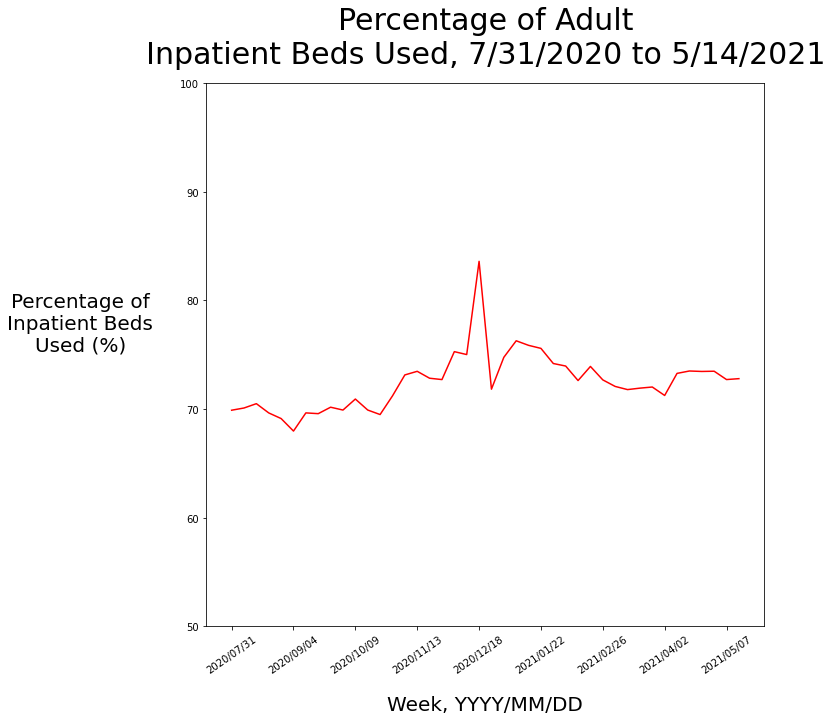

In [298]:
x = np.array(hospital_gb_sum.index)
y = (hospital_gb_sum['all_adult_hospital_inpatient_bed_occupied_7_day_sum'] 
     / hospital_gb_sum['all_adult_hospital_inpatient_beds_7_day_sum']) * 100
figure_size = (10,10)

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red', linewidth=5)
ax.set_title('Percentage of Adult\nInpatient Beds Used, 7/31/2020 to 5/14/2021', size=30, pad=20)
ax.set_xlabel('Week, YYYY/MM/DD', size=20, labelpad=20)
ax.set_ylabel('Percentage of\nInpatient Beds\nUsed (%)', rotation=0, size=20, labelpad=100)
ax.set_ylim(50, 100)
ax.set_xticks(x[::5])
plt.xticks(rotation='35');

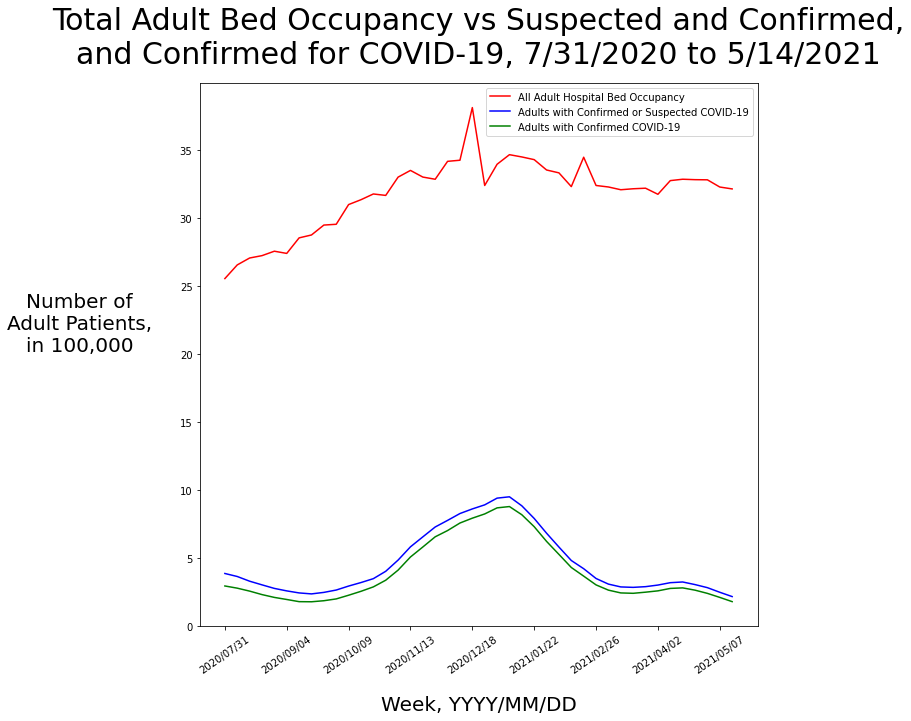

In [288]:
x = np.array(hospital_gb_sum.index)
y = hospital_gb_sum['all_adult_hospital_inpatient_bed_occupied_7_day_sum'] / 100000
y_2 = hospital_gb_sum['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'] / 100000
y_3 = hospital_gb_sum['total_adult_patients_hospitalized_confirmed_covid_7_day_sum'] / 100000

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red', label='All Adult Hospital Bed Occupancy', linewidth=5)
ax.plot(x, y_2, color='blue', label='Adults with Confirmed or Suspected COVID-19', linewidth=5)
ax.plot(x, y_3, color='green', label='Adults with Confirmed COVID-19', linewidth=5)
ax.set_title('Total Adult Bed Occupancy vs Suspected and Confirmed,\nand Confirmed for COVID-19, 7/31/2020 to 5/14/2021', size=30, pad=20)
ax.set_xlabel('Week, YYYY/MM/DD', size=20, labelpad=20)
ax.set_ylabel('Number of\nAdult Patients,\nin 100,000', rotation=0, size=20, labelpad=100)
ax.set_xticks(x[::5])
ax.legend()
plt.xticks(rotation='35');

In [320]:
# hospital_chosen_zip['percent_inpatient_beds'].idxmax()
hospital_chosen_zip['inpatient_beds_used_7_day_sum'].max()


17956.0

In [323]:
hospital_chosen_zip[hospital_chosen_zip['zip'] == 10065]

,Unnamed: 0,collection_week,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
1735,1928,2020/07/31,10065,3598.0,3332.0,3298.0,3329.0,3123.0,64.0,14.0,...,280.0,245.0,188.0,158.0,6.0,0.0,NaN,NaN,NaN,0.925236
1741,1934,2020/07/31,10065,21376.0,18074.0,15379.0,15742.0,12833.0,1013.0,329.0,...,3325.0,1701.0,2600.0,1538.0,145.0,50.0,NaN,NaN,NaN,0.863380
6228,6817,2020/08/07,10065,3598.0,3332.0,3332.0,3373.0,3141.0,61.0,15.0,...,280.0,245.0,184.0,159.0,0.0,0.0,NaN,NaN,NaN,0.937465
6235,6824,2020/08/07,10065,22105.0,18067.0,15457.0,15787.0,12715.0,1148.0,320.0,...,3479.0,1750.0,2504.0,1486.0,120.0,36.0,NaN,NaN,NaN,0.827454
10785,11676,2020/08/14,10065,3598.0,3332.0,3332.0,3214.0,3007.0,58.0,13.0,...,280.0,245.0,171.0,153.0,118.0,0.0,NaN,NaN,NaN,0.893274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191633,196417,2021/04/30,10065,24878.0,20468.0,18676.0,17629.0,14472.0,1446.0,1001.0,...,3759.0,2252.0,3097.0,1807.0,330.0,287.0,0.0,0.0,0.0,0.774901
196561,201426,2021/05/07,10065,4501.0,4235.0,4235.0,3338.0,3109.0,73.0,49.0,...,280.0,245.0,189.0,166.0,5.0,5.0,0.0,0.0,0.0,0.741613
196565,201430,2021/05/07,10065,24878.0,20468.0,18676.0,17241.0,14164.0,1226.0,697.0,...,3759.0,2244.0,3039.0,1742.0,228.0,179.0,0.0,0.0,0.0,0.757846
201499,206432,2021/05/14,10065,24878.0,20468.0,18676.0,17457.0,14317.0,1095.0,518.0,...,3759.0,2257.0,3031.0,1744.0,200.0,142.0,0.0,0.0,0.0,0.767341


In [322]:
hospital_chosen_zip.iloc[147112]
hospital_chosen_zip[hospital_chosen_zip['inpatient_beds_used_7_day_sum'] == 17956]

,Unnamed: 0,collection_week,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
147112,151255,2021/02/26,10065,24868.0,20458.0,18666.0,17956.0,14910.0,3201.0,2684.0,...,3745.0,2244.0,3288.0,2000.0,752.0,671.0,0.0,0.0,0.0,0.789622


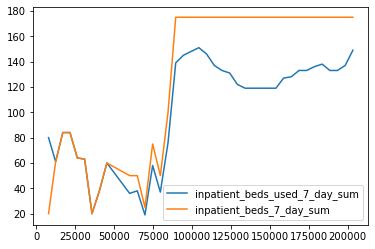

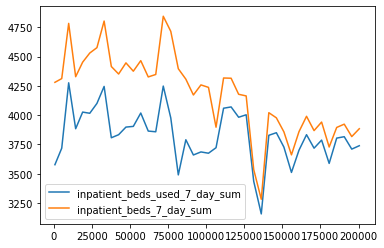

In [325]:

zip_codes = [96755, 76508]

for code in zip_codes:
    grouped_hospital.get_group(code)[['inpatient_beds_used_7_day_sum', 'inpatient_beds_7_day_sum']].plot()

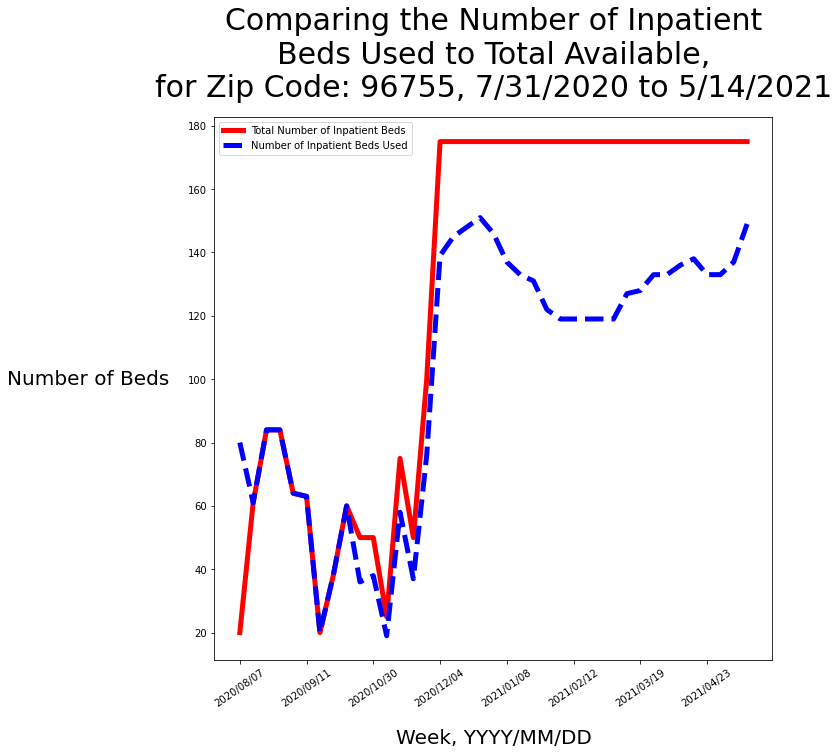

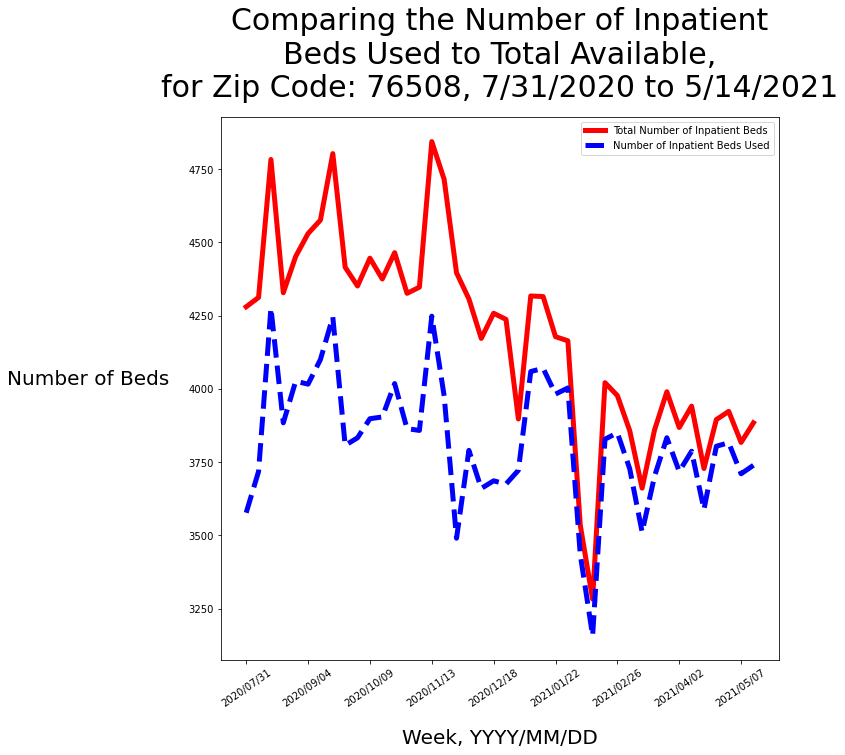

In [292]:
def line_beds_zip(code, figure_size):
    x = grouped_hospital.get_group(code)['collection_week']
    y = grouped_hospital.get_group(code)['inpatient_beds_7_day_sum']
    y_2 = grouped_hospital.get_group(code)['inpatient_beds_used_7_day_sum']

    fig, ax = plt.subplots(figsize=figure_size)
    ax.plot(x, y, color='red', label='Total Number of Inpatient Beds', linestyle='-', linewidth=5)
    ax.plot(x, y_2, color='blue', label='Number of Inpatient Beds Used', linestyle='--', linewidth=5)
    ax.set_title(f'Comparing the Number of Inpatient\nBeds Used to Total Available,\nfor Zip Code: {code}, 7/31/2020 to 5/14/2021', size=30, pad=20)
    ax.set_xlabel('Week, YYYY/MM/DD', size=20, labelpad=20)
    ax.set_ylabel('Number of Beds', rotation=0, size=20, labelpad=100)
    ax.set_xticks(x[::5])
    ax.legend()
    plt.xticks(rotation='35');
    
for code in zip_codes:
    line_beds_zip(code, figure_size)

COVID confirmed/suspected seems to be under-reported, if it has been reported at all. Will be using inpatient_beds_used_7_day_sum moving forward 

In [311]:
hospital_chosen_zip['inpatient_beds_used_7_day_sum'].describe()
# grouped_hospital.aggregate(np.mean)['inpatient_beds_used_7_day_sum'].describe()

count    204439.000000
mean        709.402453
std        1121.386876
min           4.000000
25%          72.000000
50%         248.000000
75%         919.000000
max       17956.000000
Name: inpatient_beds_used_7_day_sum, dtype: float64

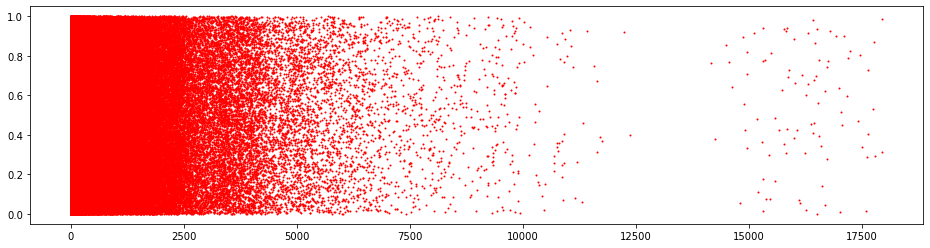

In [334]:
x = hospital_chosen_zip['inpatient_beds_used_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.scatter(x, jitter, s=1, c='red')

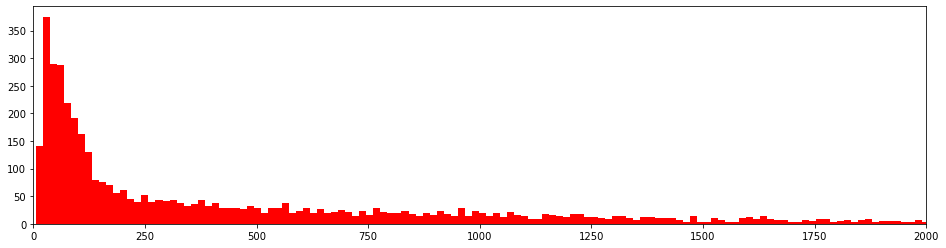

In [335]:
x = grouped_hospital.aggregate(np.mean)['inpatient_beds_used_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.hist(x, bins=1000, color='red')
ax.set_xlim(0, 2000);